数据读取-图像

    · cv2.IMREAD_COLOR: 彩色图像
    · cv2.IMREAD_GRAYSCALE: 灰度图像

In [1]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
# load image
img001 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg')

In [3]:
# 目前是h,w,c 三维图像
img001

array([[[255, 255, 250],
        [255, 255, 251],
        [255, 254, 251],
        ...,
        [251, 250, 246],
        [254, 251, 247],
        [246, 243, 239]],

       [[242, 233, 229],
        [242, 233, 229],
        [246, 237, 233],
        ...,
        [252, 249, 245],
        [253, 248, 245],
        [255, 253, 250]],

       [[172, 158, 152],
        [168, 154, 148],
        [170, 156, 150],
        ...,
        [185, 178, 175],
        [186, 179, 176],
        [182, 175, 172]],

       ...,

       [[162, 150, 150],
        [161, 149, 149],
        [163, 149, 150],
        ...,
        [143, 127, 121],
        [144, 125, 120],
        [143, 124, 119]],

       [[163, 151, 149],
        [164, 152, 150],
        [164, 150, 151],
        ...,
        [141, 125, 119],
        [142, 125, 122],
        [142, 125, 122]],

       [[166, 155, 151],
        [164, 153, 149],
        [166, 152, 153],
        ...,
        [142, 126, 120],
        [143, 126, 123],
        [142, 125, 122]]

In [4]:
# 图像的显示，也可以创建多个窗口
cv2.imshow('img001', img001)
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
img001.shape

(720, 720, 3)

In [7]:
img001_gray = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg', cv2.IMREAD_GRAYSCALE)
# 变成了h,w二维图像
img001_gray

array([[254, 255, 254, ..., 249, 250, 242],
       [233, 233, 237, ..., 248, 248, 253],
       [158, 154, 156, ..., 178, 179, 175],
       ...,
       [151, 150, 151, ..., 127, 126, 125],
       [152, 153, 152, ..., 125, 126, 126],
       [155, 153, 154, ..., 126, 127, 126]], dtype=uint8)

In [8]:
img001_gray.shape

(720, 720)

In [9]:
cv_show('img001_gray', img001_gray)

In [12]:
# 保存图像
cv2.imwrite('C:/Computer_Vision/OpenCV-Python/references/img001_gray.jpg', img001_gray)

True

In [13]:
# 图片底层类型
type(img001_gray)

numpy.ndarray

In [15]:
img001_gray.size

518400

In [16]:
img001_gray.dtype

dtype('uint8')

数据读取-视频

    · cv2.VideoCapture可以捕捉摄像头，用数字来控制不同的设备，例如0、1。
    · 如果是视频文件，直接指定好路径即可。

In [17]:
vc = cv2.VideoCapture('C:/Computer_Vision/OpenCV-Python/references/video.mp4')

In [18]:
# 检查是否打开正确
if vc.isOpened():
    openvc, frame = vc.read()
else:
    open = False

In [19]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()


截取部分图像数据

In [5]:
img002 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img002.jpg')
# 截图
img2 = img002[200:900, 200:750]
cv_show('img2', img2)

颜色通道提取

In [58]:
b, g, r = cv2.split(img2)

In [59]:
b

array([[ 55,  67,  66, ..., 254, 255, 253],
       [ 57,  74,  76, ..., 255, 255, 255],
       [ 58,  77,  83, ..., 238, 240, 242],
       ...,
       [204, 204, 205, ..., 225, 224, 224],
       [202, 203, 203, ..., 225, 224, 224],
       [201, 201, 202, ..., 225, 224, 224]], dtype=uint8)

In [60]:
b.shape

(700, 550)

In [61]:
g

array([[ 55,  65,  62, ..., 248, 248, 246],
       [ 59,  74,  74, ..., 249, 249, 249],
       [ 63,  80,  85, ..., 232, 233, 235],
       ...,
       [200, 200, 201, ..., 219, 218, 218],
       [198, 199, 199, ..., 219, 218, 218],
       [197, 197, 198, ..., 219, 218, 218]], dtype=uint8)

In [63]:
r

array([[ 43,  54,  51, ..., 229, 229, 227],
       [ 47,  62,  63, ..., 230, 230, 230],
       [ 48,  65,  73, ..., 213, 214, 216],
       ...,
       [219, 219, 220, ..., 220, 219, 219],
       [217, 218, 218, ..., 220, 219, 219],
       [216, 216, 217, ..., 220, 219, 219]], dtype=uint8)

In [64]:
img2 = cv2.merge((r, g, b))
img2.shape

(700, 550, 3)

In [66]:
cv_show('img2', img2)

In [67]:
# 只保留R
cur_img2 = img2.copy()
cur_img2[:, :, 0] = 0 # Set the blue channel to zero
cur_img2[:, :, 1] = 0 # Set the green channel to zero
cv_show('R', cur_img2) # Display the resulting image with only the red channel, with the title 'R'

In [68]:
# 只保留G
cur_img2 = img2.copy()
cur_img2[:, :, 0] = 0 # Set the blue channel to zero
cur_img2[:, :, 2] = 0 # Set the red channel to zero
cv_show('G', cur_img2) # Display the resulting image with only the green channel, with the title 'G'

In [69]:
# 只保留B
cur_img2 = img2.copy()
cur_img2[:, :, 1] = 0 # Set the green channel to zero
cur_img2[:, :, 2] = 0 # Set the red channel to zero
cv_show('B', cur_img2) # Display the resulting image with only the blue channel, with the title 'B'

边界填充

    · BORDER_REPLICATE：复制法，也就是复制最边缘像素
    · BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制，例如 fedcba|abcdefgh|hgfedcb
    · BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴对称，例如 gfedcba|abcdefgh|gfedcba
    · BORDER_WRAP：外包装法，例如 cdefgh|abcdefgh|gfedcba
    · BORDER_CONSTANT：常量法，常数值填充

In [72]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)
replicate = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_CONSTANT, value = 0)

(<Axes: title={'center': 'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

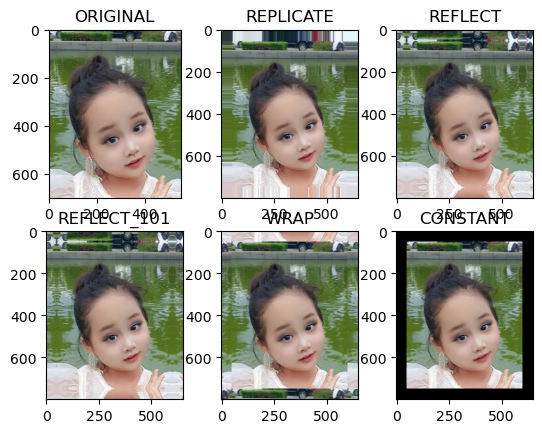

In [73]:
plt.subplot(231), plt.imshow(img2, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

数值计算

In [74]:
img_2 = img2 + 10
# selects the first 5 rows (:5) of all columns (:) in the blue channel ([:, :, 0]) of the img_002 image.
img_2[:5, :, 0]

array([[ 53,  64,  61, ..., 239, 239, 237],
       [ 57,  72,  73, ..., 240, 240, 240],
       [ 58,  75,  83, ..., 223, 224, 226],
       [ 63,  73,  83, ..., 200, 201, 202],
       [ 71,  69,  79, ..., 186, 187, 187]], dtype=uint8)

In [75]:
img_2[:5, :, 0]

array([[ 53,  64,  61, ..., 239, 239, 237],
       [ 57,  72,  73, ..., 240, 240, 240],
       [ 58,  75,  83, ..., 223, 224, 226],
       [ 63,  73,  83, ..., 200, 201, 202],
       [ 71,  69,  79, ..., 186, 187, 187]], dtype=uint8)

In [76]:
# 超过255就取减去255后的余数
(img2 + img_2)[:5, :, 0]

array([[ 96, 118, 112, ..., 212, 212, 208],
       [104, 134, 136, ..., 214, 214, 214],
       [106, 140, 156, ..., 180, 182, 186],
       [116, 136, 156, ..., 134, 136, 138],
       [132, 128, 148, ..., 106, 108, 108]], dtype=uint8)

In [77]:
# 超过255就取255
cv2.add(img2, img_2)[:5, :, 0]

array([[ 96, 118, 112, ..., 255, 255, 255],
       [104, 134, 136, ..., 255, 255, 255],
       [106, 140, 156, ..., 255, 255, 255],
       [116, 136, 156, ..., 255, 255, 255],
       [132, 128, 148, ..., 255, 255, 255]], dtype=uint8)

图像融合

In [78]:
# shape值不一致，无法进行加法
img001 + img2

ValueError: operands could not be broadcast together with shapes (720,720,3) (700,550,3) 

In [50]:
img001.shape

(720, 720, 3)

In [79]:
img2.shape

(700, 550, 3)

In [80]:
img2 = cv2.resize(img2, (720, 720))
img2.shape

(720, 720, 3)

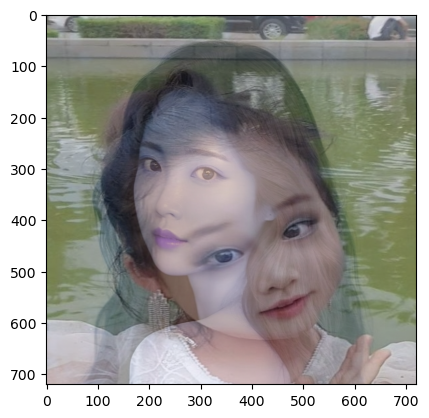

In [81]:
res = cv2.addWeighted(img001, 0.4, img2, 0.6, 0)
plt.imshow(res)

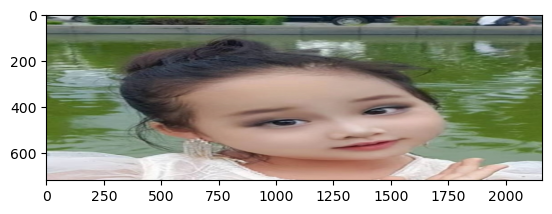

In [82]:
res = cv2.resize(img2, (0, 0), fx = 3, fy = 1)
plt.imshow(res)

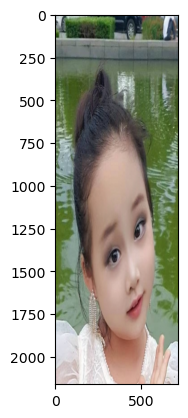

In [83]:
res = cv2.resize(img2, (0, 0), fx = 1, fy = 3)
plt.imshow(res)

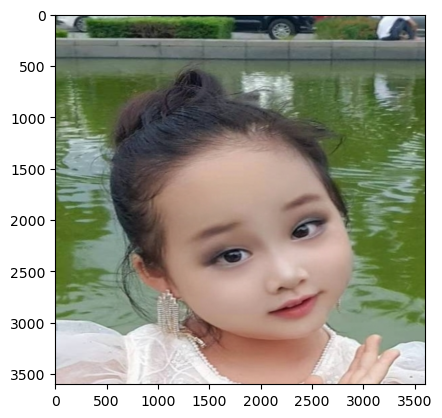

In [84]:
res = cv2.resize(img2, (0, 0), fx = 5, fy = 5)
plt.imshow(res)

形态学

    · 腐蚀操作
    · 膨胀操作
    · 开运算与闭运算
    · 梯度运算
    · 礼帽与黑帽
    · 腐蚀操作与膨胀操作互为逆运算

In [ ]:
img = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/circle.jpg')
cv_show('img', img)

腐蚀操作

In [88]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
cv_show('erosion', erosion)

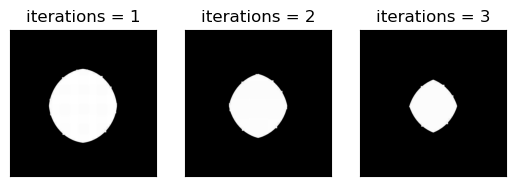

In [91]:
kernel = np.ones((30, 30), np.uint8) #腐蚀操作
erosion1 = cv2.erode(img, kernel, iterations = 1)
erosion2 = cv2.erode(img, kernel, iterations = 2)
erosion3 = cv2.erode(img, kernel, iterations = 3)
#res = np.hstack((erosion1, erosion2, erosion3))
#cv_show('res', res)
plt.subplot(131), plt.imshow(erosion1), plt.title('iterations = 1')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(erosion2), plt.title('iterations = 2')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(erosion3), plt.title('iterations = 3')
plt.xticks([]), plt.yticks([])
plt.show()

膨胀操作

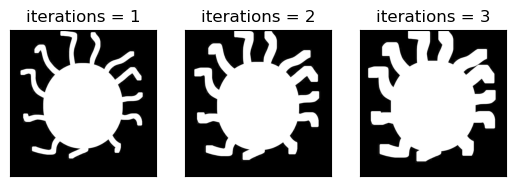

In [93]:
kernel = np.ones((10,10), np.uint8) #膨胀处理
dilate1 = cv2.dilate(img, kernel, iterations = 1)
dilate2 = cv2.dilate(img, kernel, iterations = 2)
dilate3 = cv2.dilate(img, kernel, iterations = 3)
#res = np.hstack((dilate1, dilate2, dilate3))
#cv_show('res', res)
plt.subplot(131), plt.imshow(dilate1), plt.title('iterations = 1')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilate2), plt.title('iterations = 2')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dilate3), plt.title('iterations = 3')
plt.xticks([]), plt.yticks([])
plt.show()

开运算和闭运算

In [96]:
#开：先腐蚀，再膨胀
kernel = np.ones((7,7), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#cv_show('opening', opening)

In [97]:
#闭：先膨胀，再腐蚀
kernel = np.ones((10,10), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#cv_show('closing', closing)

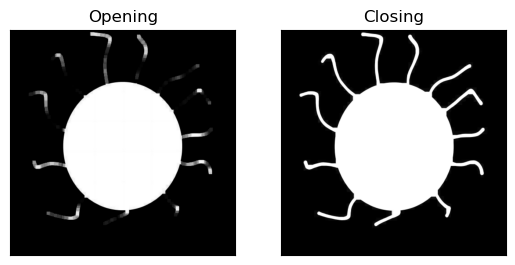

In [98]:
plt.subplot(121), plt.imshow(opening), plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing), plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

梯度运算

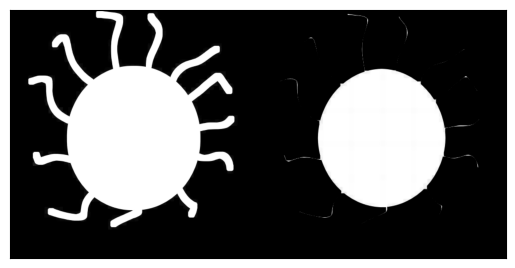

In [99]:
#梯度 = 膨胀 - 腐蚀
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(img, kernel, iterations = 3) #膨胀
erosion = cv2.erode(img, kernel, iterations = 3) #腐蚀
res = np.hstack((dilate, erosion))
#cv_show('res', res)
plt.imshow(res)
plt.xticks([]), plt.yticks([])
plt.show()

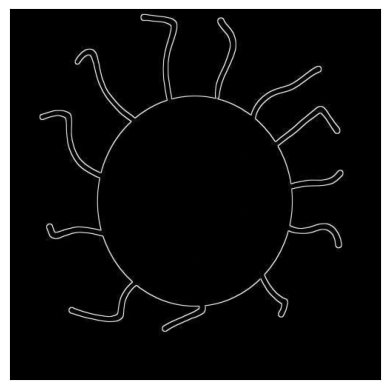

In [102]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
#cv_show('gradient', gradient)
plt.imshow(gradient)
plt.xticks([]), plt.yticks([])
plt.show()

礼帽与黑帽

  · 礼帽 = 原始输入 - 开运算结果
  · 黑帽 = 闭运算 - 原始输入

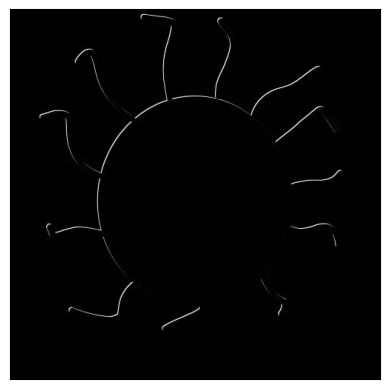

In [100]:
#礼帽
kernel = np.ones((2,2), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#cv_show('opening', opening)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
#cv_show('tophat', tophat)
plt.imshow(tophat)
plt.xticks([]), plt.yticks([])
plt.show()

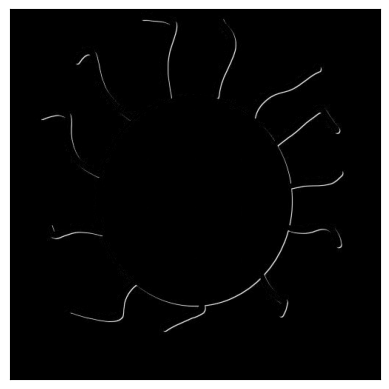

In [101]:
#黑帽
kernel = np.ones((2,2), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#cv_show('opening', opening)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
#cv_show('blackhat', blackhat)
plt.imshow(blackhat)
plt.xticks([]), plt.yticks([])
plt.show()

图像梯度

    · dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
    · dx和dy分别表示水平和竖直方向
    · ksize是Sobel算子的大小
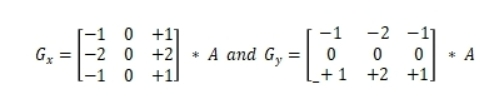

    · 水平方向：P5 = (P3 - P1) + 2 x (P6 - P4) + (P9 - P7)
    · 垂直方向：P5 = (P7 - P1) + 2 x (P8 - P2) + (P9 - P3)
    · 在水平方向上，P4和P6距离P5的位置更近，因此给予的权重更大。在垂直方向上，P2和P8距离P5更近，因此基于的权重更大。

 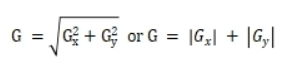

    · Sobel算子 = |左 - 右| 或 |下 - 上|
    · Scharr算子 = |左 - 右| 或 |下 - 上|
    · Laplacian算子 = |中 - 左| + |中 - 右| + |中 - 下| + |中 - 上|
  
Scharr算子具有和Sobel算子同样的速度，且精度更高。是Sobel算子的改进版。

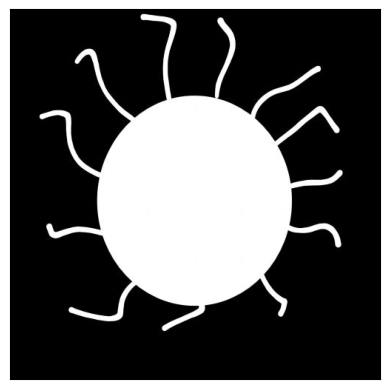

In [5]:
pie = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/circle.jpg', cv2.IMREAD_GRAYSCALE)
plt.xticks([]), plt.yticks([])
plt.imshow(pie, cmap = 'gray') #转换了opencv和matplotlib的颜色通道
plt.show()

In [8]:
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize = 3) #CV_64F refers to 64-bit floating-point data type.
cv_show('sobelx', sobelx)
#白到黑是正数，黑到白是负数，所有的负数会被截断成0，所以要取绝对值。
# plt.xticks([]), plt.yticks([])
# plt.imshow(sobelx, cmap = 'gray')
# plt.show()

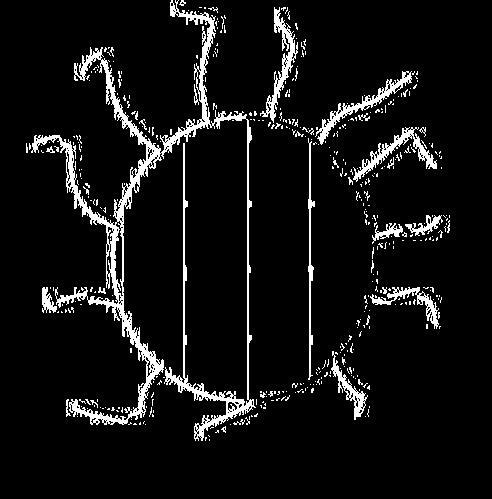

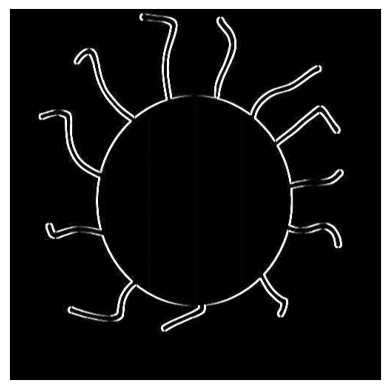

In [12]:
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize = 3) #有cv2.CV_64F才能只求绝对值
sobelx = cv2.convertScaleAbs(sobelx)
#cv_show('sobelx', sobelx)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelx, cmap = 'gray')
plt.show()

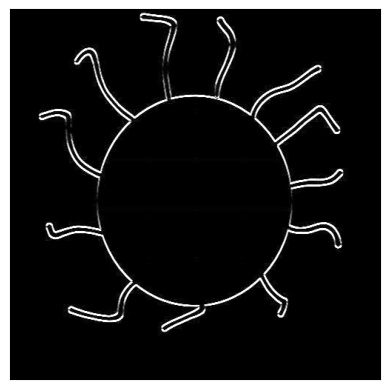

In [13]:
sobely = cv2.Sobel(pie, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
#cv_show('sobely', sobely)
plt.xticks([]), plt.yticks([])
plt.imshow(sobely, cmap = 'gray')
plt.show()

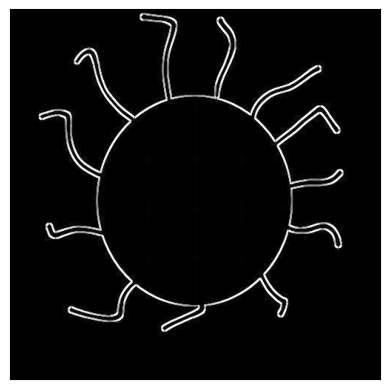

In [14]:
#分别计算x和y，再求和
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
#cv_show('sobelxy', sobelxy)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

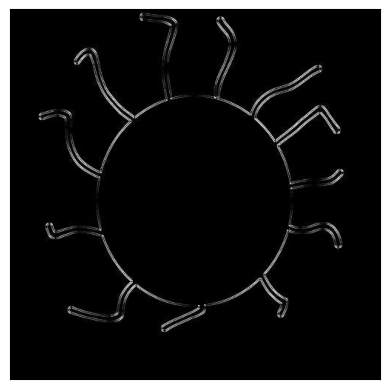

In [15]:
#不建议直接进行计算，有可能影响效果
sobelxy = cv2.Sobel(pie, cv2.CV_64F,1,1,ksize = 3)
sobelxy = cv2.convertScaleAbs(sobelxy)
#cv_show('sobelxy', sobelxy)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

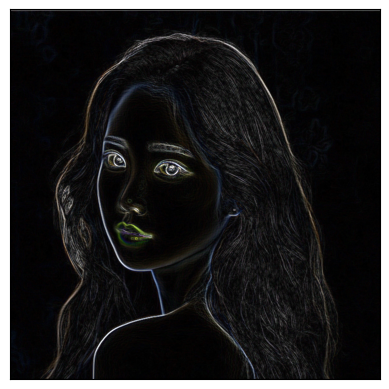

In [18]:
sobelx = cv2.Sobel(img001, cv2.CV_64F, 1, 0, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img001, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
#cv_show('sobelxy', sobelxy)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

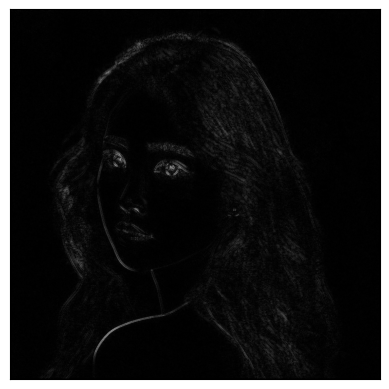

In [78]:
img1 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg', cv2.IMREAD_GRAYSCALE)
sobelxy = cv2.Sobel(img1, cv2.CV_64F, 1, 1, ksize = 3)
sobelxy = cv2.convertScaleAbs(sobelxy)
#cv_show('sobelxy', sobelxy)
#这一段与上面一段分别相加的图片相区别
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

图像梯度 - Scharr算子

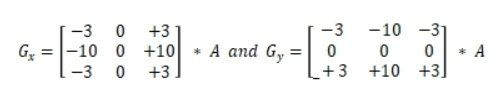

图像梯度 - Laplacian算子

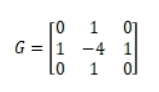

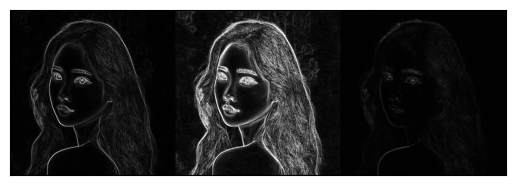

In [21]:
#不同算子的差异

#Sobel算子
sobelx = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize = 3)
sobely = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

#Scharr算子
scharrx = cv2.Scharr(img1, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img1, cv2.CV_64F, 0, 1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

#Laplacian算子
laplacian = cv2.Laplacian(img1, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

#Sobel看起来目前效果最好，但是Scharr是Sobel的升级版，根据图片的不同择其优使用。
#Laplacian算子简化了算法，但是效果并不出色，通常与其他工具一起使用。
res = np.hstack((sobelxy, scharrxy, laplacian))
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(res, cmap = 'gray')
plt.show()

图像平滑

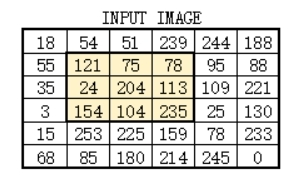

In [54]:
def add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    """
    Add salt and pepper noise to the image.
    """
    noisy_image = image.copy()
    row, col, ch = noisy_image.shape
    # Salt noise
    salt = np.random.rand(row, col, ch) < salt_prob
    noisy_image[salt] = 255
    # Pepper noise
    pepper = np.random.rand(row, col, ch) < pepper_prob
    noisy_image[pepper] = 0
    return noisy_image

In [51]:
#b, g, r = cv2.split(img001)
#img01 = cv2.merge((r, g, b))

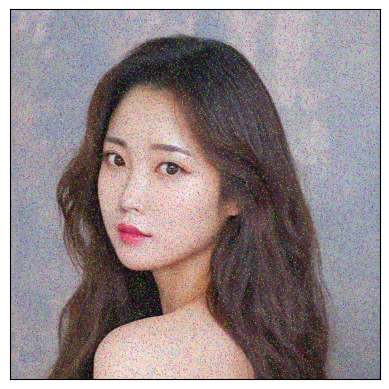

In [57]:
# Add salt and pepper noise
img_noisy = add_salt_and_pepper_noise(img001)
#cv_show('img_noisy', img_noisy)
# Save the noisy image to a file
cv2.imwrite('C:/Computer_Vision/OpenCV-Python/references/img_noisy.jpg', img_noisy)
# Display the original and noisy images
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img_noisy, cv2.COLOR_BGR2RGB))
plt.show()

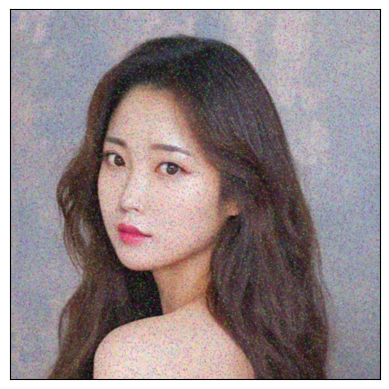

In [61]:
img_noisy = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img_noisy.jpg')
#均值滤波
#简单的平均卷积操作
blur = cv2.blur(img_noisy, (3,3))
#cv_show('blur', blur)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

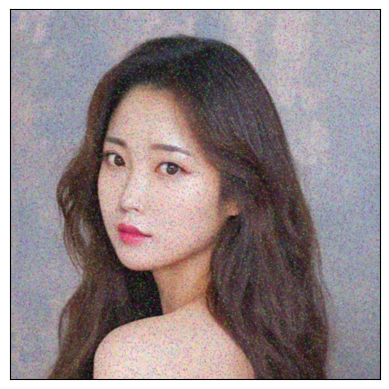

In [62]:
#方框滤波
#基本和均值一样，可以选择归一化
box = cv2.boxFilter(img_noisy, -1, (3,3), normalize = True)
#方框滤波里normalize = True的话就跟均值滤波一模一样，所以这一段其实跟上一段是一样的。
#cv_show('box', box)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB))
plt.show()

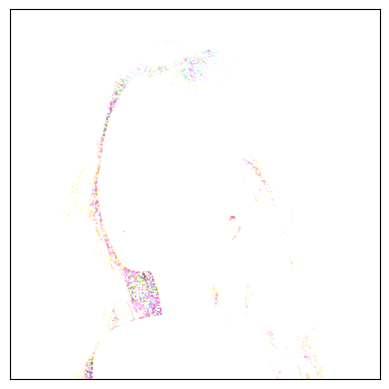

In [63]:
#方框滤波
#基本和均值一样，可以选择归一化
box = cv2.boxFilter(img_noisy, -1, (3,3), normalize = False)
#方框滤波里normalize = True的话就跟均值滤波一模一样，所以这一段其实跟上一段是一样的。
#cv_show('box', box)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB))
plt.show()

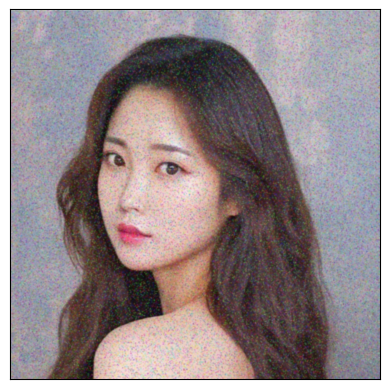

In [64]:
#高斯滤波
#高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
gaussian = cv2.GaussianBlur(img_noisy, (5,5), 1)
#cv_show('gaussian', gaussian)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
plt.show()

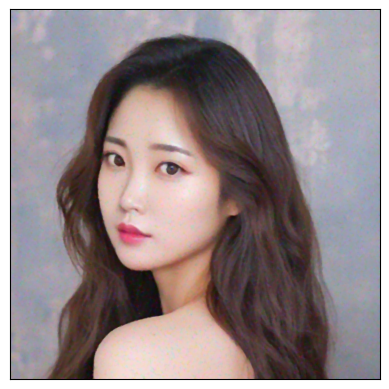

In [65]:
#中值滤波
#相当于用中值代替
median = cv2.medianBlur(img_noisy, 5) #指定完滤波器大小，然后选取中间值代替
#cv_show('median', median)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.show()

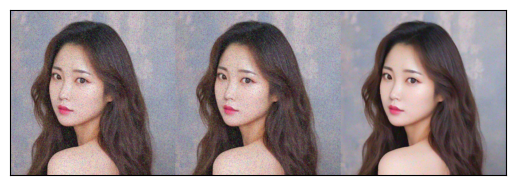

In [68]:
#展示所有的滤波效果
res = np.hstack((cv2.cvtColor(blur, cv2.COLOR_BGR2RGB), cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB), cv2.cvtColor(median, cv2.COLOR_BGR2RGB)))
#print(res)
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(res)
plt.show()

图像阈值

    · res,dst = cv2.threshold(src, thresh, maxval, type)
    · src:输入图，只能输入单通道图像，通常来说为灰度图
    · dst:输出图
    · thresh:阈值
    · maxval:当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
    · type:二值化操作的类型，包含以下5种类型:cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV,cv2.THRESH_TRUNC,cv2.THRESH_TOZERO,cv2.THRESH_TOZERO_INV
  
      · cv2.THRESH_BINARY:超过阈值部分取maxval(最大值)，否则取0
      · cv2.THRESH_BINARY_INV:THRESH_BINARY的反转
      · cv2.THRESH_TRUNC:大于阈值部分设为阈值，否则不变
      · cv2.THRESH_TOZERO:大于与之部分不改变，否则设为0
      · cv2.THRESH_TOZERO_INV:THRESH_TOZERO的反转

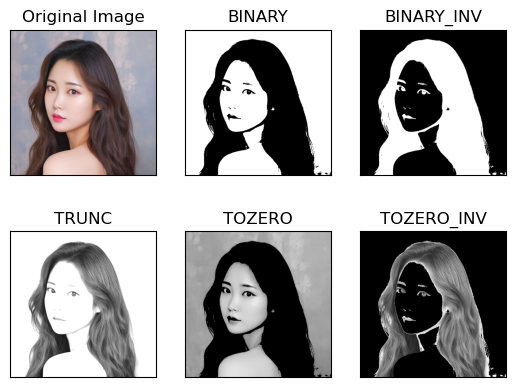

In [75]:
ret, thresh1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img1, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img1, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img1, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [cv2.cvtColor(img001, cv2.COLOR_BGR2RGB), thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Canny边缘检测

    · 1）使用高斯滤波器，以平滑图像，滤除噪声。
    · 2）计算图像中每个像素点的梯度强度和方向。
    · 3）应用非极大值(Non-Maximum Suppression)抑制，以消除边缘检测带来的杂散响应。
    · 4）应用双阈值(Double-Threshold)检测来确定真实的和潜在的边缘。
    · 5）通过抑制孤立的弱边缘最终完成边缘检测。

1.高斯滤波器

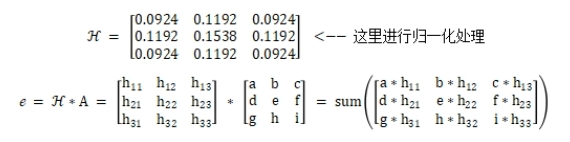

2.梯度和方向

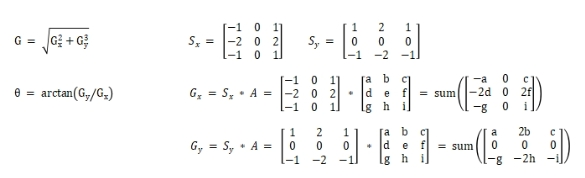

3.非极大值抑制

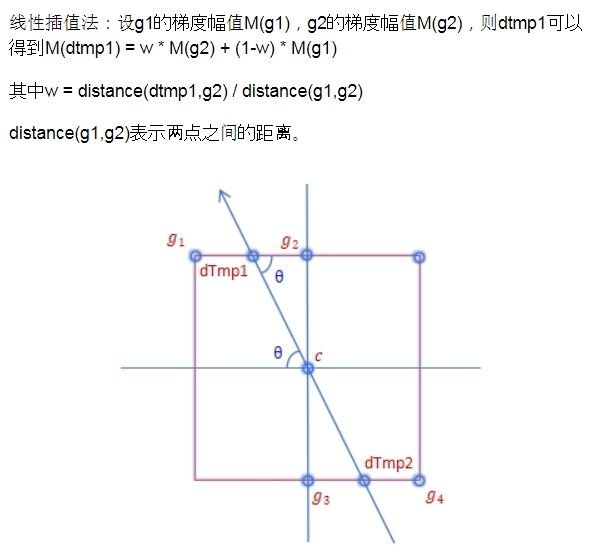

为了简化计算，由于一个像素周围有八个像素，把一个像素的梯度方向离散为八个方向，这样就只需计算前后即可，不用插值了。

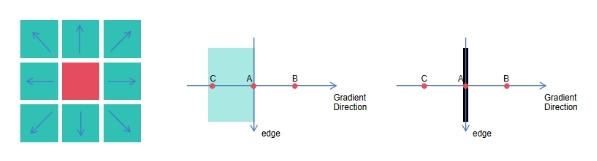

4.双阈值检测

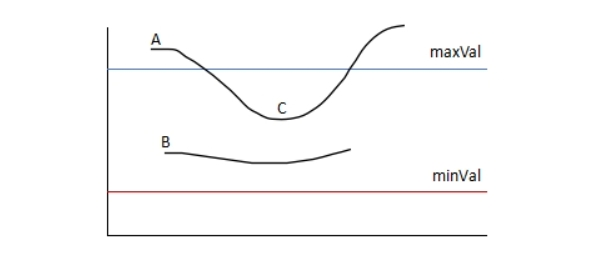

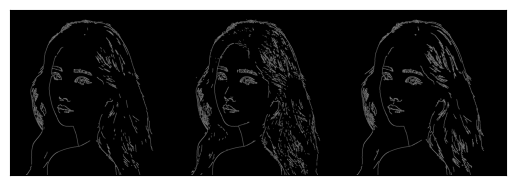

In [77]:
v1 = cv2.Canny(img1, 80, 150)
v2 = cv2.Canny(img1, 80, 100)
v3 = cv2.Canny(img1, 50, 150)
res = np.hstack((v1, v2, v3))
#cv_show('res',res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))#改变了颜色通道
plt.show()

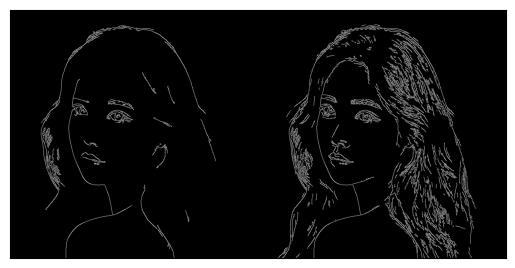

In [79]:
v1 = cv2.Canny(img1, 50, 250)
v2 = cv2.Canny(img1, 50, 100)
res = np.hstack((v1, v2))
#cv_show('res',res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))#改变了颜色通道
plt.show()

图像轮廓

cv2.findContours(img,mode,method)

mode:轮廓检索模式

    · RETR_EXTERNAL:只检索最外面的轮廓；
    · RETR_LIST:检索所有的轮廓。并将其保存到一条链表当中；
    · RETR_CCOMP:检索所有的轮廓，并将他们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界
    · RETR_TREE:检索所有的轮廓，并重构嵌套轮廓的整个层次。

method:轮廓逼近方法

    · CHAIN_APPROX_NONE:以Freeman链码的方式输出轮廓，所有其他方法输出多边形(顶点的序列)。
    · CHAIN_APPROX_SIMPLE:压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分。

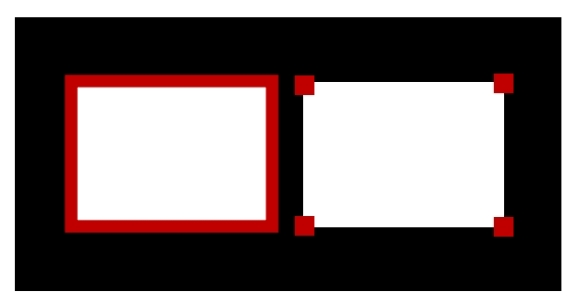

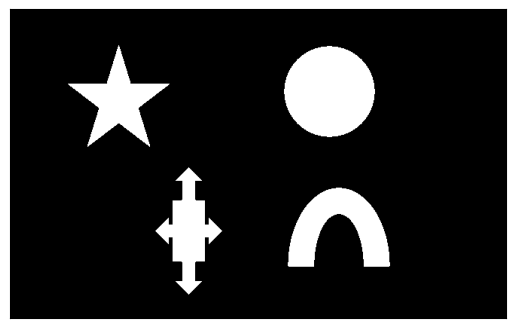

In [156]:
#为了更高的准确率，使用二值图像。
imgs = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/imgs.png')
gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#cv_show('thresh', thresh)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

In [83]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
contours

(array([[[433, 237]],
 
        [[432, 238]],
 
        [[431, 238]],
 
        [[430, 238]],
 
        [[429, 238]],
 
        [[428, 238]],
 
        [[427, 238]],
 
        [[426, 239]],
 
        [[425, 239]],
 
        [[424, 239]],
 
        [[423, 239]],
 
        [[422, 240]],
 
        [[421, 240]],
 
        [[420, 240]],
 
        [[419, 241]],
 
        [[418, 241]],
 
        [[417, 242]],
 
        [[416, 242]],
 
        [[415, 243]],
 
        [[414, 243]],
 
        [[413, 244]],
 
        [[412, 244]],
 
        [[411, 245]],
 
        [[410, 246]],
 
        [[409, 246]],
 
        [[408, 247]],
 
        [[407, 248]],
 
        [[406, 249]],
 
        [[405, 249]],
 
        [[404, 250]],
 
        [[403, 251]],
 
        [[402, 252]],
 
        [[401, 253]],
 
        [[400, 254]],
 
        [[399, 255]],
 
        [[398, 256]],
 
        [[397, 257]],
 
        [[396, 258]],
 
        [[395, 259]],
 
        [[394, 260]],
 
        [[394, 261]],
 
        [[393, 2

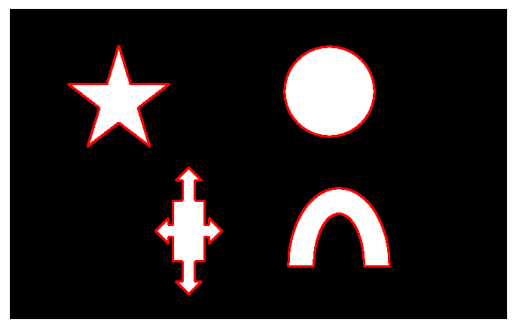

In [84]:
#传入绘制图像，轮廓，轮廓索引，颜色模式，线条厚度
#注意需要copy，不然原图会变。。。
draw_img = imgs.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
#-1默认为全选轮廓，如果不是-1则挨个选择外轮廓和内轮廓
#(0，0，255)为BGR,这里指红色
#2为粗细。这些值可以进行改变。
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

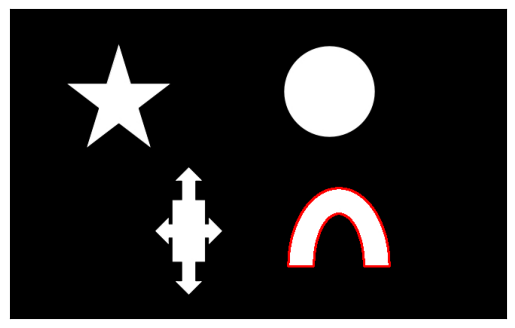

In [85]:
draw_img = imgs.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 0, 255), 2)
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

In [86]:
cnt = contours[0]

In [87]:
#面积
cv2.contourArea(cnt)

7298.0

In [88]:
#周长,True表示闭合的
cv2.arcLength(cnt,True)

530.1320307254791

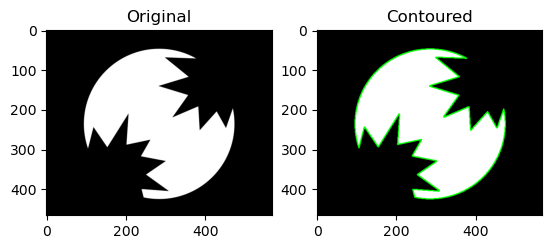

In [92]:
img0 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/image.png')
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
draw_img2 = img0.copy()
res = cv2.drawContours(draw_img2, [cnt], -1, (0, 255, 0), 2)
#cv_show('res',res)
plt.subplot(121), plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB), 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), 'gray'), plt.title('Contoured')
plt.show()

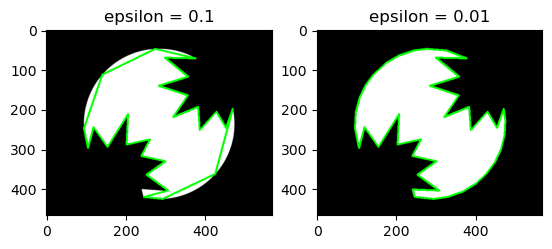

In [97]:
epsilon1 = 0.01 * cv2.arcLength(cnt, True)
epsilon2 = 0.001 * cv2.arcLength(cnt, True)
approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)
draw_img3 = img0.copy()
draw_img4 = img0.copy()
res1 = cv2.drawContours(draw_img3, [approx1], -1, (0, 255, 0), 3) #做了近似
res2 = cv2.drawContours(draw_img4, [approx2], -1, (0, 255, 0), 3)
#cv_show('res', res)
plt.subplot(121), plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB), 'gray'), plt.title('epsilon = 0.1')
plt.subplot(122), plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB), 'gray'), plt.title('epsilon = 0.01')
plt.show()

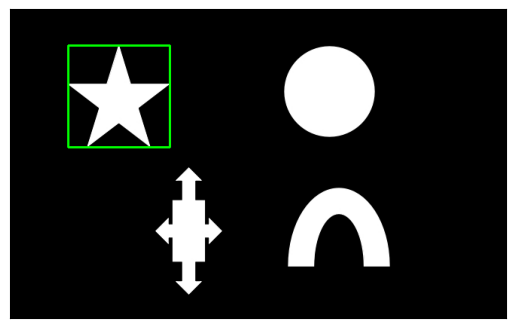

In [128]:
#接矩形
imgs = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/imgs.png')
gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[3] #换这个参数可以选择各个图片的接矩形(同样分里层和外层)
x, y, w, h = cv2.boundingRect(cnt)
imgs1 = cv2.rectangle(imgs, (x, y), (x+w, y+h), (0, 255, 0), 2)
#cv_show('imgs1', imgs1)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(imgs1, cv2.COLOR_BGR2RGB))
plt.show()

In [122]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
#(x，y)为矩形左上角的坐标，(w，h)是矩形的宽和高
rect_area = w * h
extent = float(area) / rect_area
print('轮廓面积与边界矩形面积比：',extent)

轮廓面积与边界矩形面积比： 0.4861111111111111


外接圆

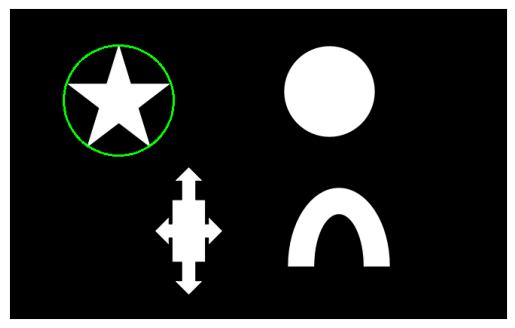

In [130]:
imgs = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/imgs.png')
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
imgs2 = cv2.circle(imgs, center,radius, (0,255,0), 2)
#v_show('imgs2', imgs2)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(imgs2, cv2.COLOR_BGR2RGB))
plt.show()

模板匹配

模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与(图像被模板覆盖的地方)的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出的结果的矩阵里是(A-a+1)x(B-b+1).

In [132]:
#模板匹配
template = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/face.png')
h, w = template.shape[:2]
img001.shape

(720, 720, 3)

In [133]:
template.shape

(374, 329, 3)

OpenCV中的模板匹配函数是：matchTemplate(img,template,method) 

模板匹配计算方法（最好用归一化的参数）：

        · TM_SQDIFF 计算平方不同，计算出的值越小，越相关
        · TM_CCORR 计算相关性，计算出来的值越大，越相关
        · TM_CCOEFF 计算相关系数，计算出来的值越大，越相关
        · TM_SQDIFF_NORMED 计算归一化平方不同，计算出来的值越接近0，越相关
        · TM_CCORR_NORMED 计算归一化相关性，计算出来的值越接近1，越相关
        · TM_CCOEFF_NORMED 计算归一化相关系数，计算出来的值越接近1，越相关

建议使用带归一化的方法，结果会更准确。

In [135]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
#从下面输出结果可知，TM_CCORR的匹配结果很差
res = cv2.matchTemplate(img001, template, cv2.TM_SQDIFF)
res.shape

(347, 392)

In [136]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
#最小值，最大值，最小值的坐标位置，最大值的坐标位置
#min_loc最重要
min_val

5324086.0

In [137]:
max_val

5160586752.0

In [138]:
min_loc

(136, 138)

In [139]:
max_loc

(25, 322)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


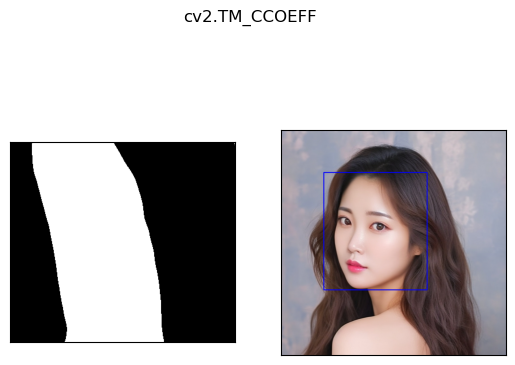

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


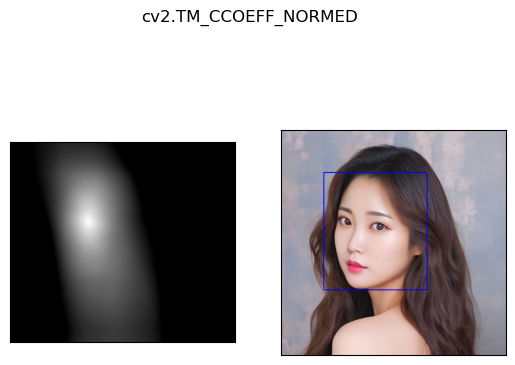

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


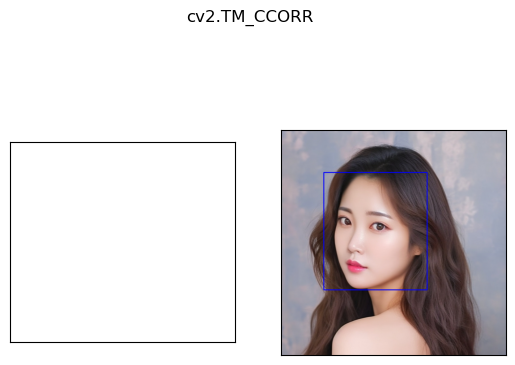

3


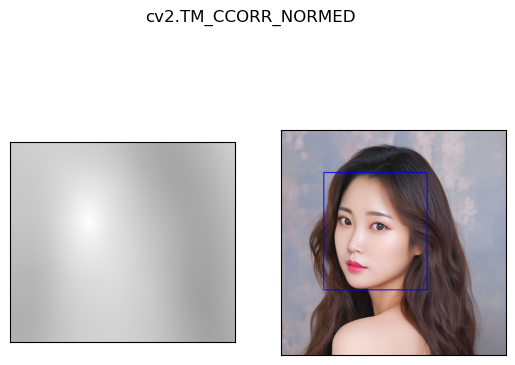

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


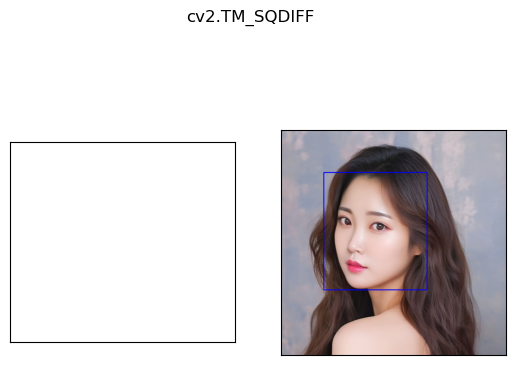

1


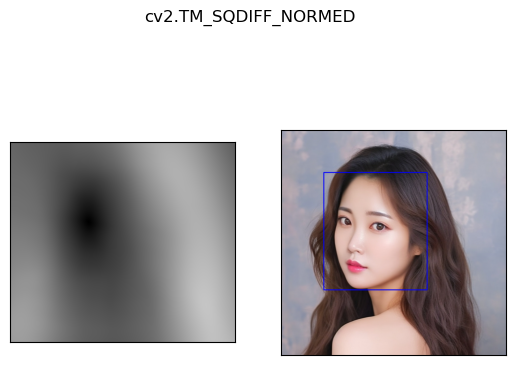

In [141]:
for meth in methods:
    img2 = img001.copy()
    #匹配方法的真值
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img001, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    #如果是平方差匹配TM_SQDIFF或归一化平方差匹配TM_SQDIFF_NORMED,取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    #画矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), cmap = 'gray')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), cmap = 'gray')
    plt.xticks([]), plt.yticks([]) 
    plt.suptitle(meth)
    plt.show()

匹配多个对象

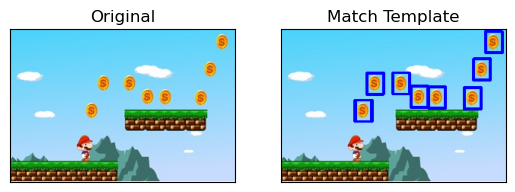

In [142]:
img_rgb = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/mario.png')
b, g, r = cv2.split(img_rgb)
img_rgb2 = cv2.merge([r, g, b])
img_gray = cv2.cvtColor(img_rgb2, cv2.COLOR_BGR2GRAY)
template = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/coin.png',0)
h, w = template.shape[:2]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
#取匹配程度大于80%的坐标
loc = np.where(res >= threshold) 
img_match = img_rgb2.copy()
for pt in zip(*loc[::-1]): #*号表示可选参数
    bottom_right = ((pt[0]) + w, pt[1] + h)
    cv2.rectangle(img_match, pt, bottom_right, (0, 0, 255), 2)
#cv_show('img_rgb', img_rgb)
plt.subplot(121), plt.imshow(img_rgb2, 'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(122), plt.imshow(img_match, 'gray'), plt.title('Match Template')
plt.xticks([]), plt.yticks([])
plt.show()

图像金字塔

    · 高斯金字塔
    · 拉普拉斯金字塔

高斯代表“模糊”，拉普拉斯代表“差异”。

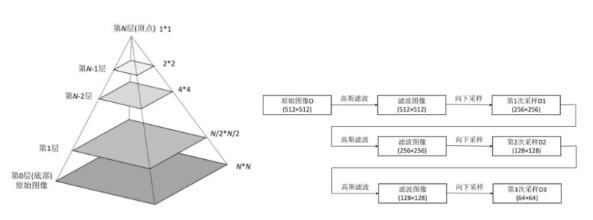

高斯金字塔：向下采样方法(缩小，即往上走叫向下采样) 

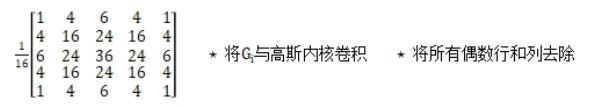

高斯金字塔：向上采样方法(放大，即往下走叫向上采样)

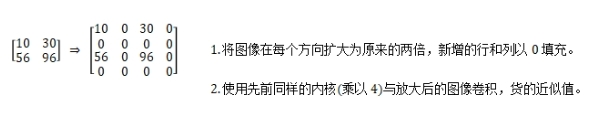

In [148]:
img_yueyetu = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/cartoon.png')
#为了避免拉普拉斯金字塔后出现error，这边对图像进行了偶数化resize
img_yueyetu = cv2.resize(img_yueyetu, (452, 372))
b, g, r = cv2.split(img_yueyetu)
img_yueyetu = cv2.merge([r, g, b])
print(img_yueyetu.shape)
#cv_show('img', img)

(372, 452, 3)


In [150]:
#向上采样
up = cv2.pyrUp(img_yueyetu)
#cv_show('up', up)
print(up.shape)

(744, 904, 3)


In [151]:
#向下采样
down = cv2.pyrDown(img_yueyetu)
#cv_show('down', down)
print(down.shape)

(186, 226, 3)


In [152]:
up2 = cv2.pyrUp(up)
#cv_show('up2', up2)
print(up2.shape)

(1488, 1808, 3)


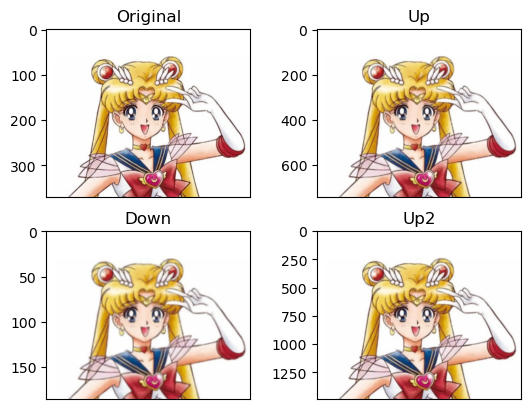

In [153]:
#使用cv2打开，就能更直观地看到图片的大小。
plt.subplot(221), plt.imshow(img_yueyetu, 'gray'), plt.title('Original')
plt.xticks([])
plt.subplot(222), plt.imshow(up, 'gray'), plt.title('Up')
plt.xticks([])
plt.subplot(223), plt.imshow(down, 'gray'), plt.title('Down')
plt.xticks([])
plt.subplot(224), plt.imshow(up2, 'gray'), plt.title('Up2')
plt.xticks([])
plt.show()
#关注一下y轴标尺变化(x轴标尺设置了隐藏)

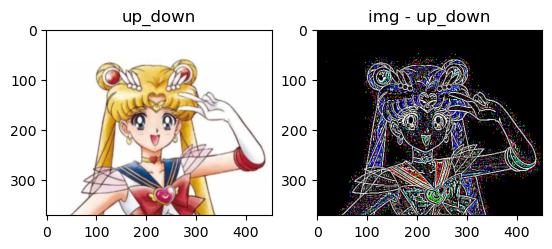

In [154]:
#做一次上采样，又做一次下采样，由于数据丢失，于是产生了下图
up3 = cv2.pyrUp(img_yueyetu)
up_down = cv2.pyrDown(up)
#cv_show('img-up_down', img-up_down)
plt.subplot(121), plt.imshow(up_down, 'gray'), plt.title('up_down')
plt.subplot(122), plt.imshow(img - up_down, 'gray'), plt.title('img - up_down')
plt.show()
#img - up_down 正是被丢失的部分数据

拉普拉斯金字塔

* 1.低通滤波
* 2.缩小尺寸
* 3.放大尺寸
* 4.图像相减

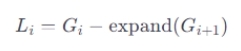

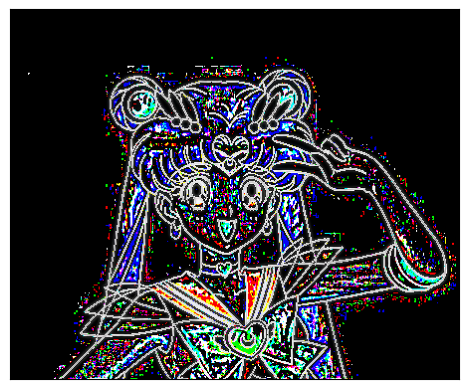

In [155]:
down2 = cv2.pyrDown(img_yueyetu)
down_up = cv2.pyrUp(down2)
#img.shape
#down_up.shape
#由于图像shape是单数，则拉普拉斯金字塔在down和up过程中尺寸shape发生变化，所以在一开始加上了图片resize成偶数的步骤。
lap = img - down_up
plt.xticks([]), plt.yticks([])
plt.imshow(lap)
plt.show()